# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [214]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [215]:
#Load dataset
url = "diabetes.csv"
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [216]:
# Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [217]:
# View dataset description. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


##### Although, there are no null value the dataset has records of zeros for variables which cannot be zeros

In [218]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [301]:
# Average age for individuals in the dataset
round(df.Age.mean())

33

In [302]:
# individuals with diabetes
diabetic = df[df['Outcome'] == 1]

In [303]:
# display group
diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,42,33.6,0.627,50,1
2,8,183,64,20,42,23.3,0.672,32,1
6,3,78,50,32,88,31.0,0.248,26,1
11,10,168,74,20,42,38.0,0.537,34,1
14,5,166,72,19,175,25.8,0.587,51,1


In [304]:
# average glucose level of individuals who are diabetic
round(diabetic.Glucose.mean(),2)

140.21

In [305]:
# individuals without diabetes
non_diabetic = df[df['Outcome'] == 0]

In [306]:
# display group
non_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,42,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,20,42,25.6,0.201,30,0
10,4,110,92,20,42,37.6,0.191,30,0
20,3,126,88,41,235,39.3,0.704,27,0


In [225]:
# average glucose level of non diabetic
non_diabetic.Glucose.mean()

109.98

In [307]:
# average BMI for individuals who are diabetic
round(diabetic.BMI.mean(),2)

34.52

In [308]:
# average BMI for non diabetic
round(non_diabetic.BMI.mean(),2)

30.82

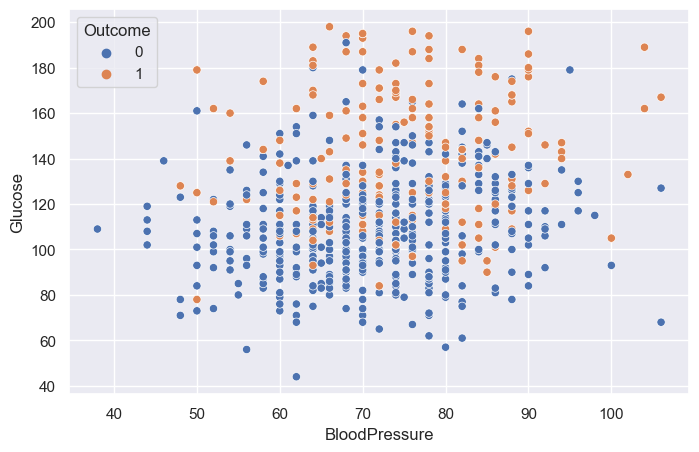

In [309]:
# display relationship between Blood pressure and glucose and the outcome variables
sns.scatterplot(x= "BloodPressure" ,y= "Glucose",
              hue="Outcome",
              data=df);

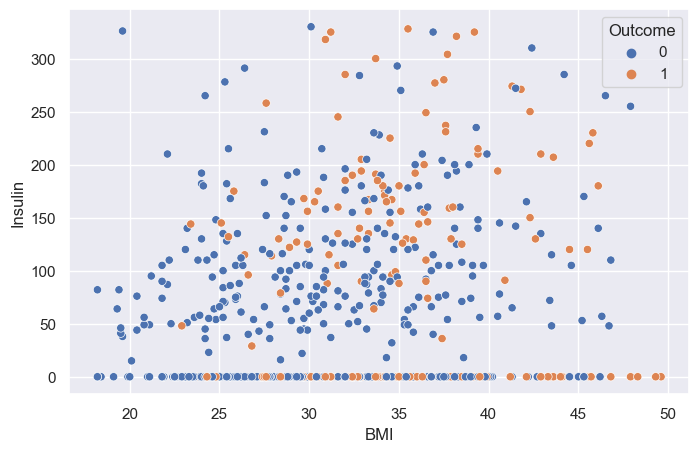

In [268]:
# display relationship between the BMI, insulin and outcome variables
sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

##### Distribution of the predictor variables for individuals with diabetes.

<Figure size 800x500 with 0 Axes>

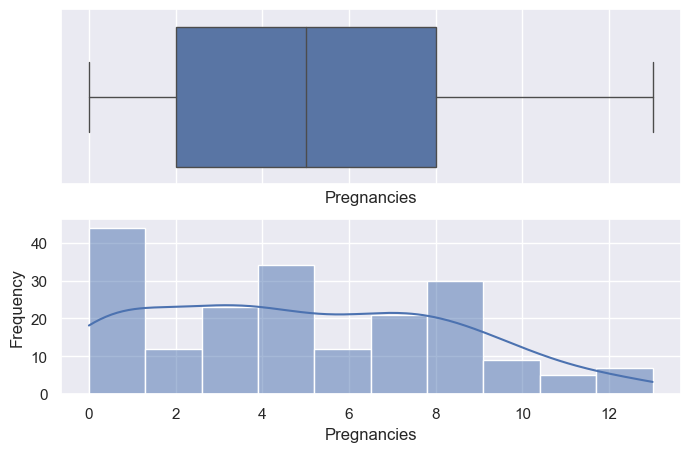

<Figure size 800x500 with 0 Axes>

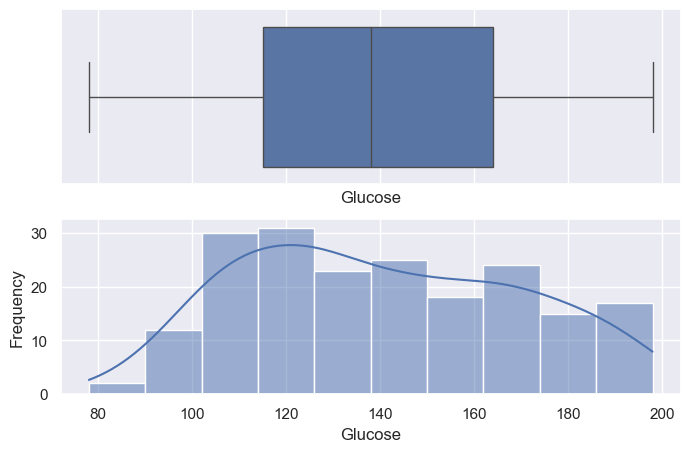

<Figure size 800x500 with 0 Axes>

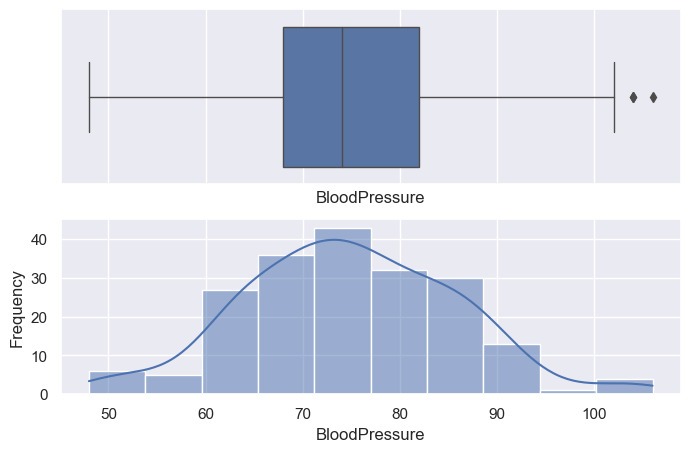

<Figure size 800x500 with 0 Axes>

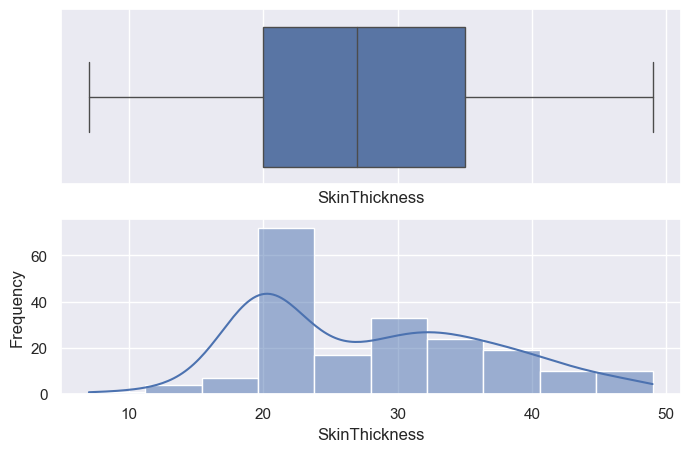

<Figure size 800x500 with 0 Axes>

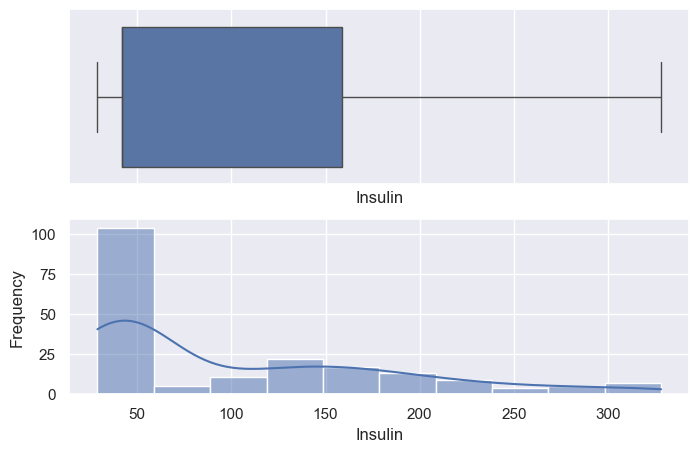

<Figure size 800x500 with 0 Axes>

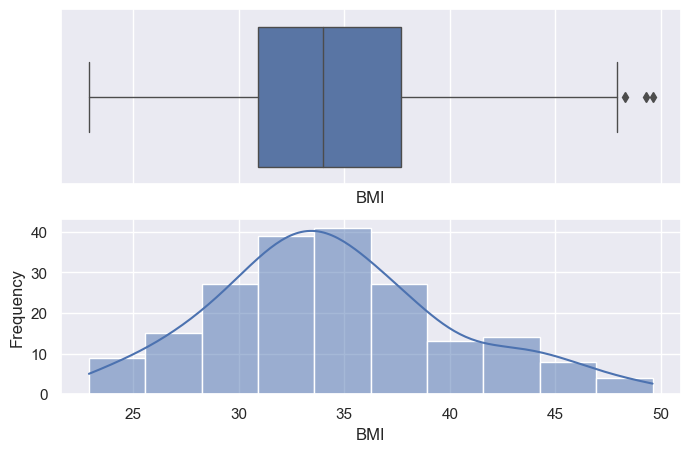

<Figure size 800x500 with 0 Axes>

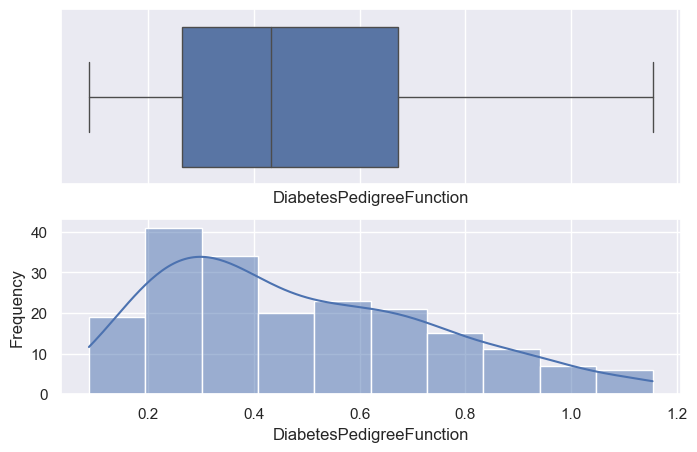

<Figure size 800x500 with 0 Axes>

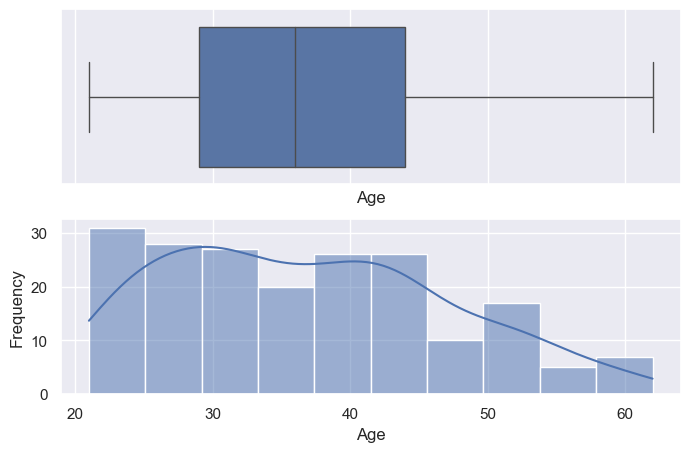

In [310]:
# EDA for each variable
# Check for outliers
for i in diabetic.columns[0:-1]:
    #print(cols[columns])
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(diabetic[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(diabetic[i], ax=ax_hist , bins = 10,kde=True)

##### Distribution of the predictor variables for individuals without diabetes?

<Figure size 800x500 with 0 Axes>

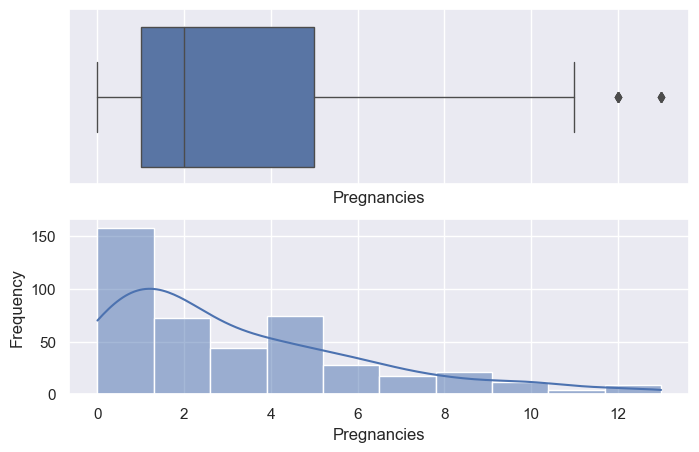

<Figure size 800x500 with 0 Axes>

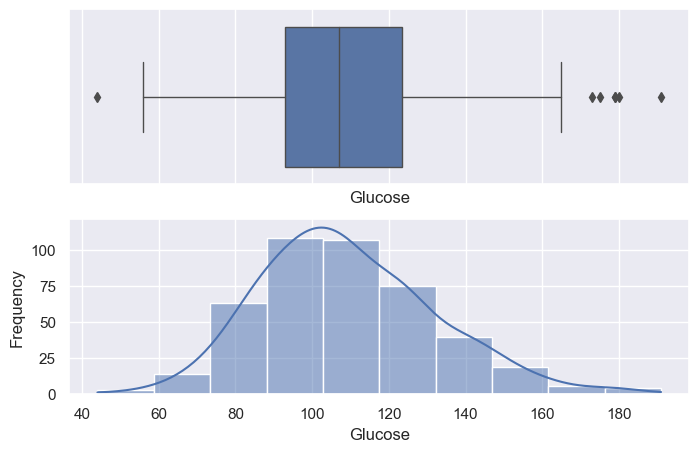

<Figure size 800x500 with 0 Axes>

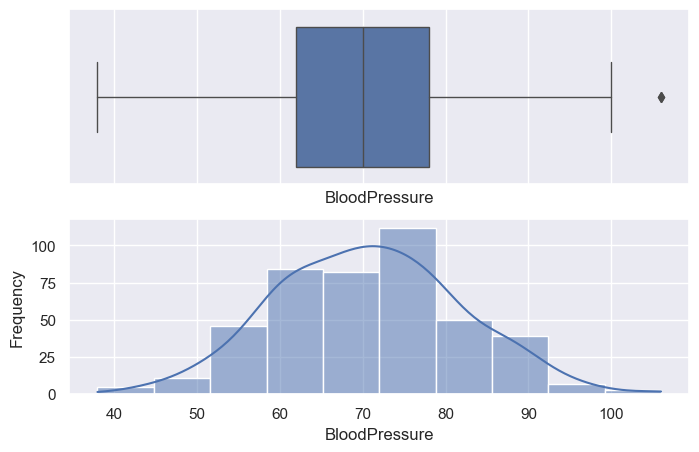

<Figure size 800x500 with 0 Axes>

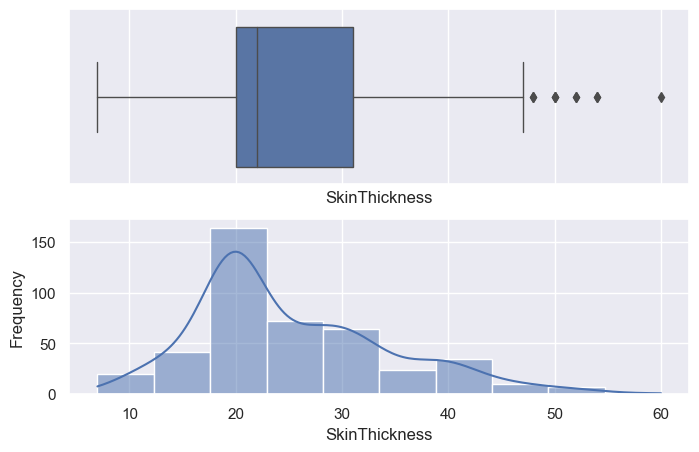

<Figure size 800x500 with 0 Axes>

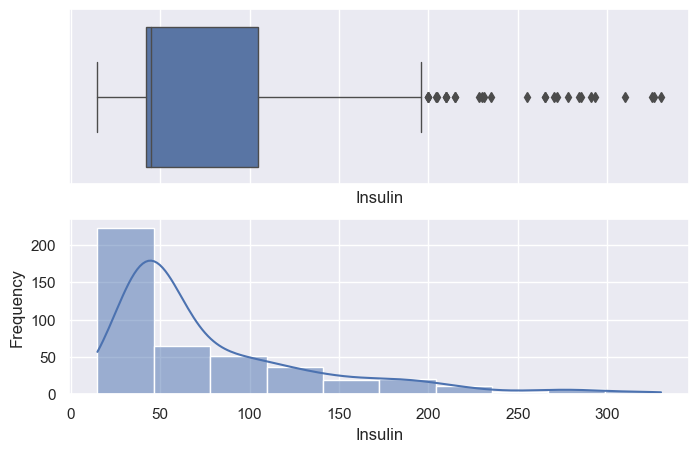

<Figure size 800x500 with 0 Axes>

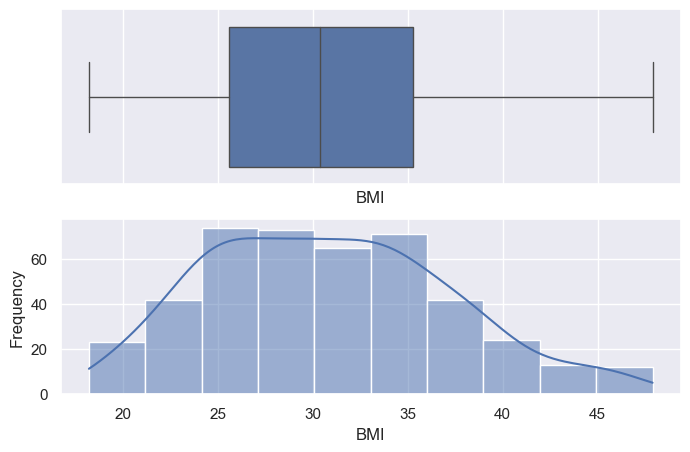

<Figure size 800x500 with 0 Axes>

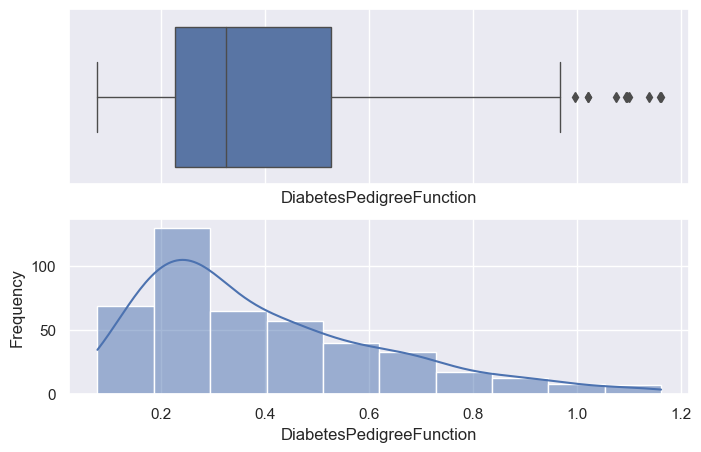

<Figure size 800x500 with 0 Axes>

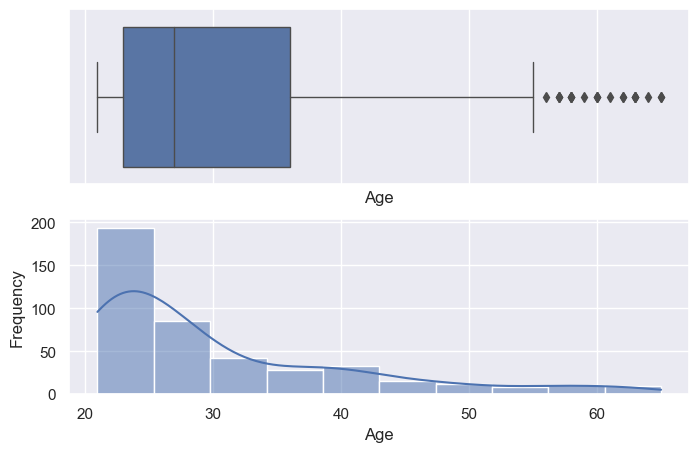

In [311]:
# EDA for each variable
# Check for outliers
for i in non_diabetic.columns[0:-1]:
    #print(cols[columns])
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(non_diabetic[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(non_diabetic[i], ax=ax_hist , bins = 10,kde=True)

##### More people between the ages of 20 to 60 have diabetes conpared to non diabetic
##### Glucose level is higher for diabetic group compared to non diabetic group

In [314]:
# correlation between independent variables
var = df.drop(columns=['Outcome'], axis=1)

In [315]:
# show correlation table
cor = var.corr()
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.130759,0.206581,0.037307,-0.050857,0.037389,-0.013274,0.582318
Glucose,0.130759,1.000000,0.227750,0.095661,0.337634,0.193989,0.051546,0.268977
BloodPressure,0.206581,0.227750,1.000000,0.150657,0.012171,0.290307,0.022308,0.345872
SkinThickness,0.037307,0.095661,0.150657,1.000000,0.285269,0.546359,0.120643,0.022832
Insulin,-0.050857,0.337634,0.012171,0.285269,1.000000,0.196580,0.215401,0.000343
BMI,0.037389,0.193989,0.290307,0.546359,0.196580,1.000000,0.148256,0.066110
DiabetesPedigreeFunction,-0.013274,0.051546,0.022308,0.120643,0.215401,0.148256,1.000000,0.031168
Age,0.582318,0.268977,0.345872,0.022832,0.000343,0.066110,0.031168,1.000000


<AxesSubplot:>

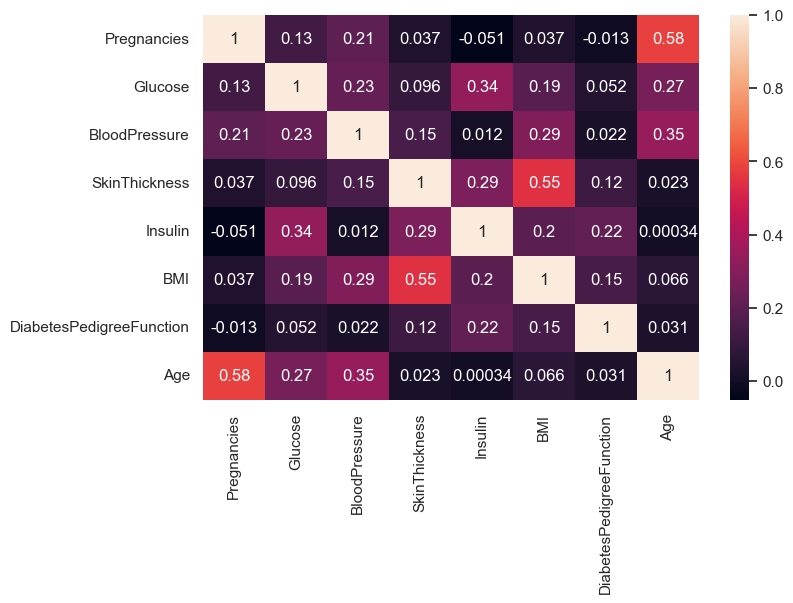

In [316]:
#plot heatmap
sns.heatmap(cor, annot=True)

##### Most the variables have positive relationship or correlation with each other

<AxesSubplot:xlabel='Outcome', ylabel='count'>

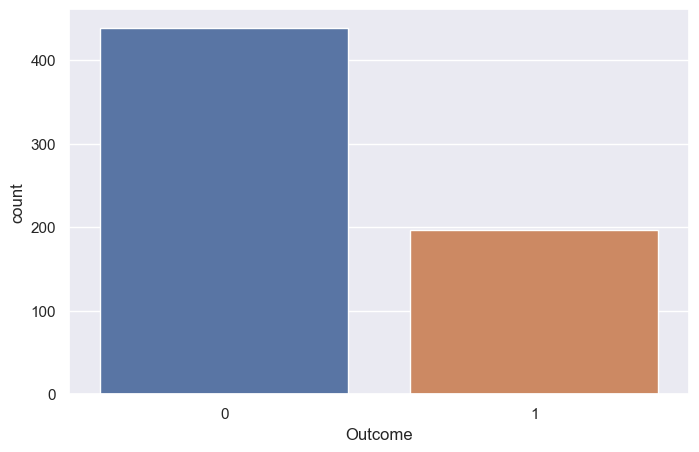

In [317]:
#Check the balance of the data by plotting the count of outcomes by their value. 
sns.countplot(df["Outcome"])

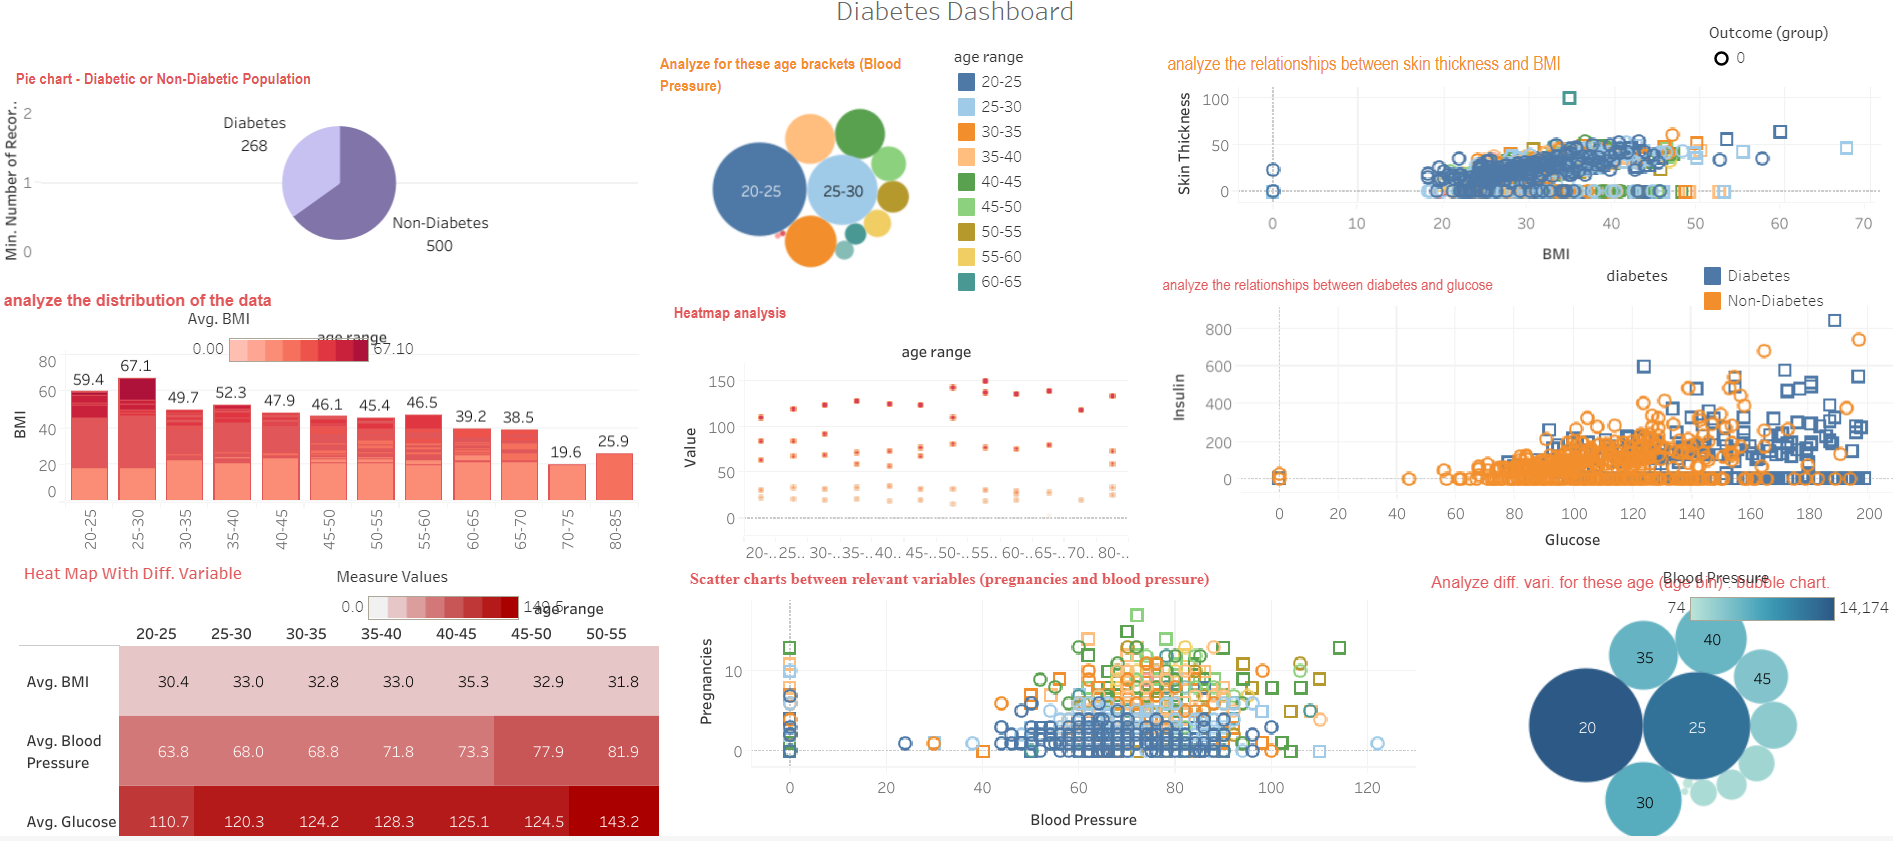

In [371]:
# display variables relationship using tableau dashboard for data visualization.
image = "C:/Users/berna/Diabetes Dashboard.png"
display.Image(image)

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

<Figure size 800x500 with 0 Axes>

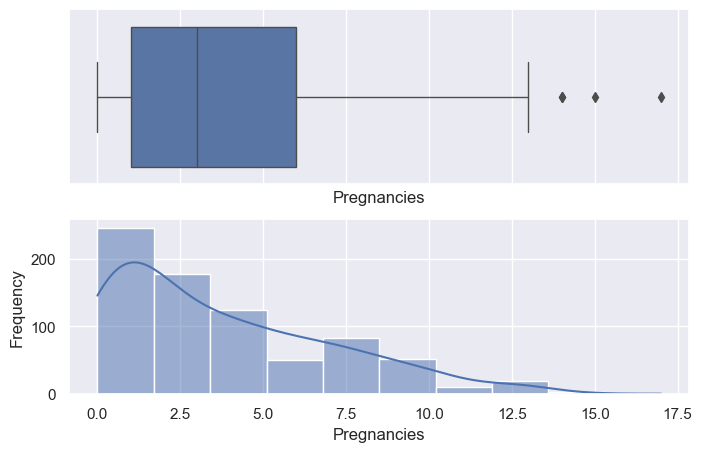

<Figure size 800x500 with 0 Axes>

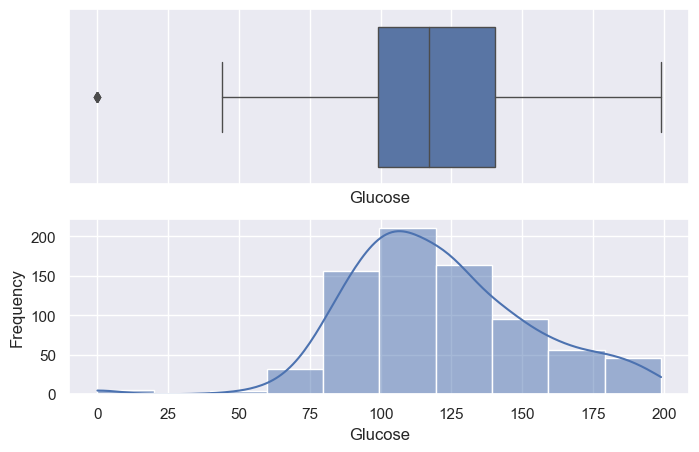

<Figure size 800x500 with 0 Axes>

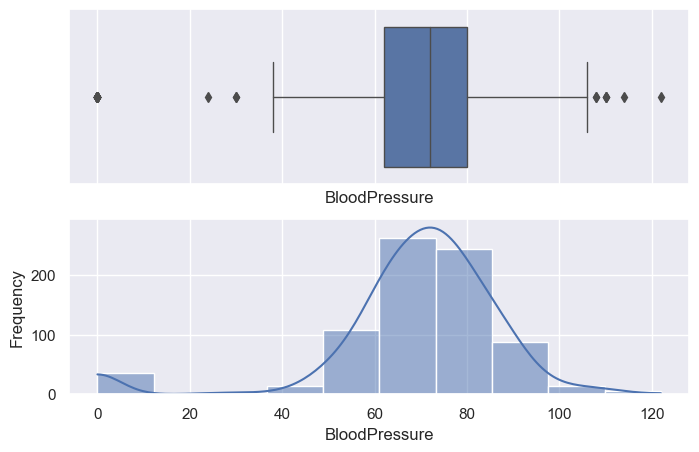

<Figure size 800x500 with 0 Axes>

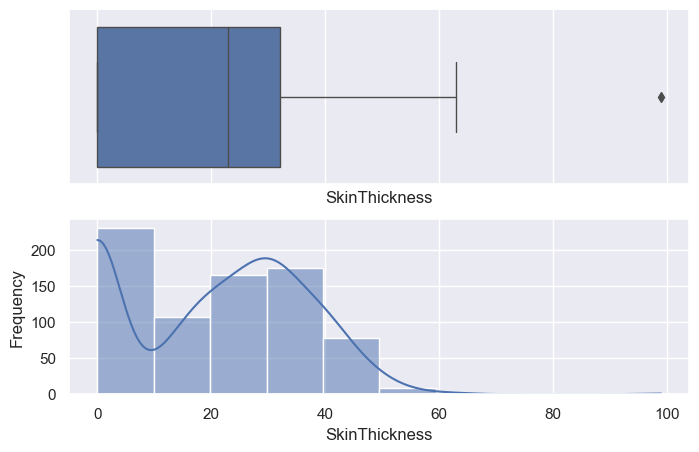

<Figure size 800x500 with 0 Axes>

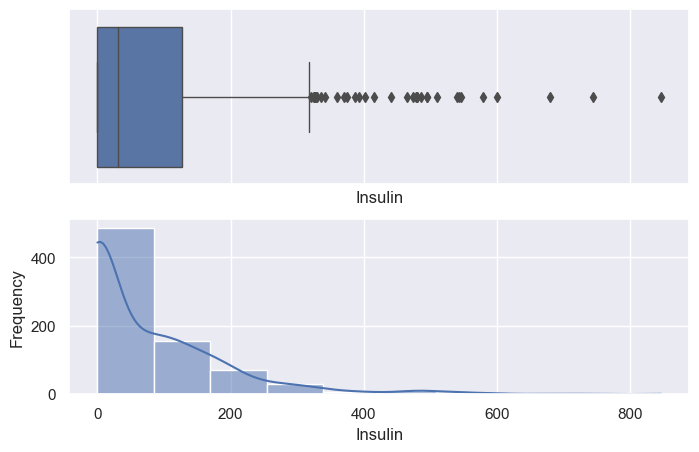

<Figure size 800x500 with 0 Axes>

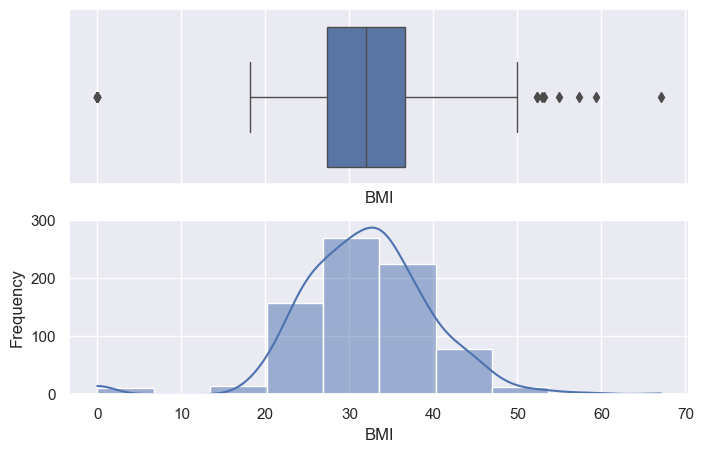

<Figure size 800x500 with 0 Axes>

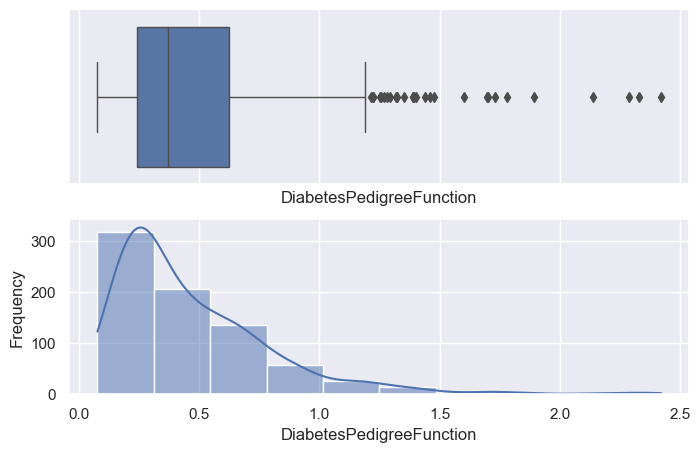

<Figure size 800x500 with 0 Axes>

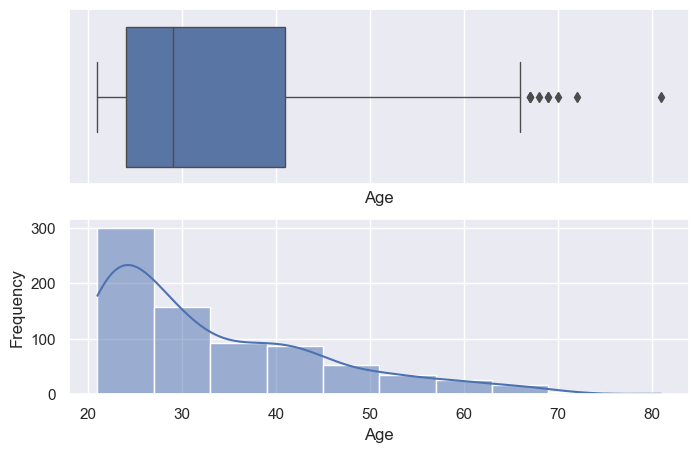

<Figure size 800x500 with 0 Axes>

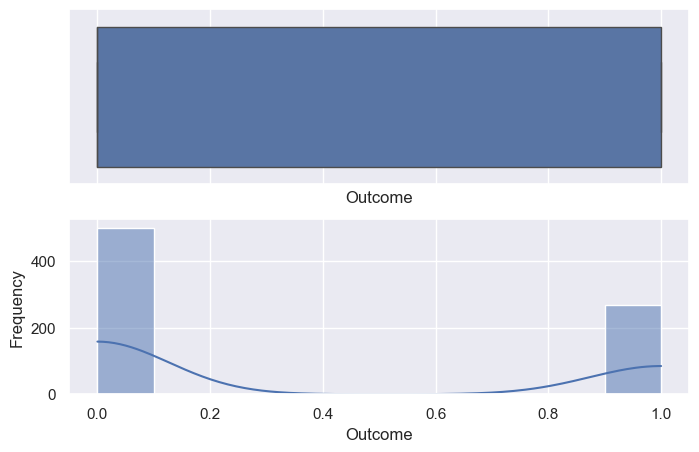

In [236]:
# Check for outliers
for i in df.columns:
    #print(cols[columns])
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

#### After analyzing the boxplot and the histogram we can identify that there are some outliers in some variables.

In [319]:
# make it copy of the dataframe
df_copy = df.copy()

In [320]:
# identify outliers for glucose
Q3 = df["Glucose"].quantile(0.75)
Q1 = df["Glucose"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

37.25 136.25 99.0


In [239]:
# treat outliers for Glucose columns using IQR
df = df[~((df["Glucose"] < (Q1 - 1.5 * IQR)) | (df["Glucose"] > (Q3 + 1.5 * IQR)))]

In [240]:
# identify outliers for pregnancies
Q3 = df["Pregnancies"].quantile(0.75)
Q1 = df["Pregnancies"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

5.0 6.0 1.0


In [241]:
# treat outliers for pregnancies columns using IQR
df = df[~((df["Pregnancies"] < (Q1 - 1.5 * IQR)) | (df["Pregnancies"] > (Q3 + 1.5 * IQR)))]

In [242]:
# identify outliers for blood pressure
Q3 = df["BloodPressure"].quantile(0.75)
Q1 = df["BloodPressure"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

18.0 80.0 62.0


In [243]:
# treat outliers for bloodpressure columns using IQR
df = df[~((df["BloodPressure"] < (Q1 - 1.5 * IQR)) | (df["BloodPressure"] > (Q3 + 1.5 * IQR)))]

In [244]:
# identify outliers for skin thickness
Q3 = df["SkinThickness"].quantile(0.75)
Q1 = df["SkinThickness"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

33.0 33.0 0.0


In [245]:
# treat outliers for skin thickness columns using IQR
df = df[~((df["SkinThickness"] < (Q1 - 1.5 * IQR)) | (df["SkinThickness"] > (Q3 + 1.5 * IQR)))]

In [246]:
# identify outliers for insulin
Q3 = df["Insulin"].quantile(0.75)
Q1 = df["Insulin"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

132.0 132.0 0.0


In [247]:
# treat outliers for insulin columns using IQR
df = df[~((df["Insulin"] < (Q1 - 1.5 * IQR)) | (df["Insulin"] > (Q3 + 1.5 * IQR)))]

In [248]:
# identify outliers for BMI
Q3 = df["BMI"].quantile(0.75)
Q1 = df["BMI"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

8.950000000000003 36.175000000000004 27.225


In [249]:
# treat outliers for BMI columns using IQR
df = df[~((df["BMI"] < (Q1 - 1.5 * IQR)) | (df["BMI"] > (Q3 + 1.5 * IQR)))]

In [250]:
# identify outliers for Diabetes pedigree function
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)
Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

0.37150000000000005 0.6165 0.245


In [251]:
# treat outliers for Diabetes pedigree function columns using IQR
df = df[~((df["DiabetesPedigreeFunction"] < (Q1 - 1.5 * IQR)) | (df["DiabetesPedigreeFunction"] > (Q3 + 1.5 * IQR)))]

In [252]:
# identify outliers for Age
Q3 = df["Age"].quantile(0.75)
Q1 = df["Age"].quantile(0.25)
IQR = Q3 - Q1
print(IQR, Q3, Q1)

16.5 40.5 24.0


In [253]:
# treat outliers for Age columns using IQR
df = df[~((df["Age"] < (Q1 - 1.5 * IQR)) | (df["Age"] > (Q3 + 1.5 * IQR)))]

<Figure size 800x500 with 0 Axes>

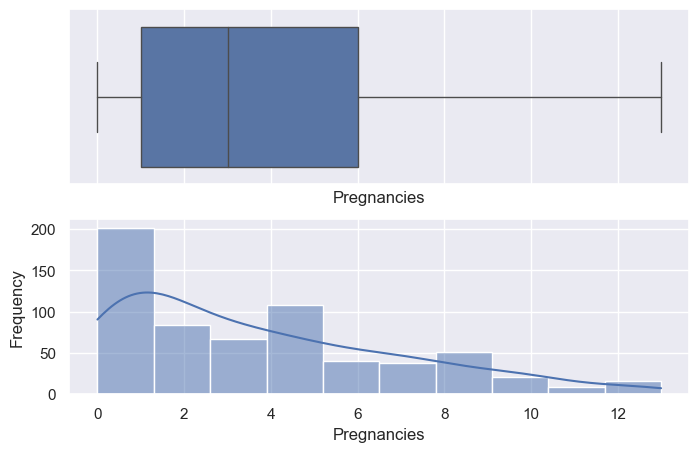

<Figure size 800x500 with 0 Axes>

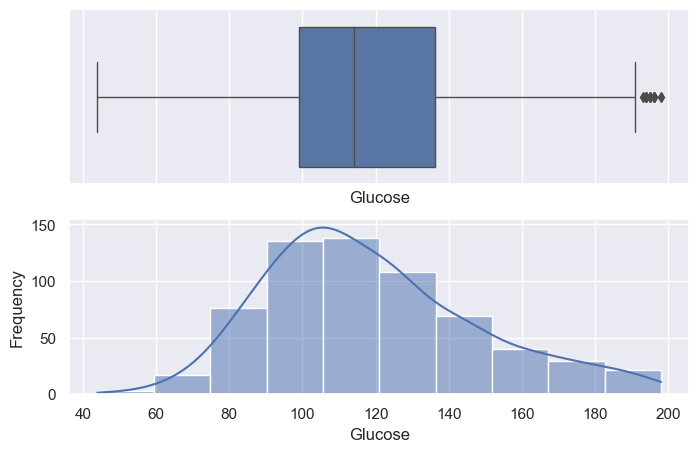

<Figure size 800x500 with 0 Axes>

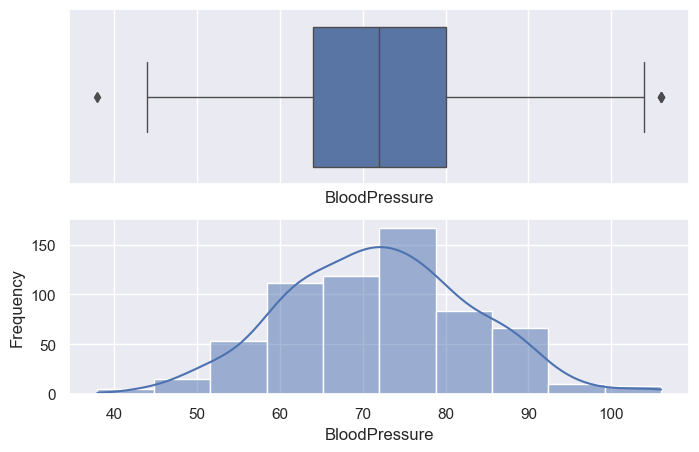

<Figure size 800x500 with 0 Axes>

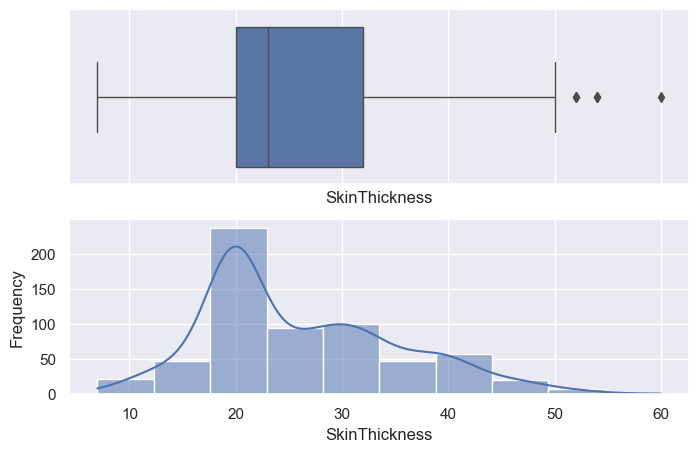

<Figure size 800x500 with 0 Axes>

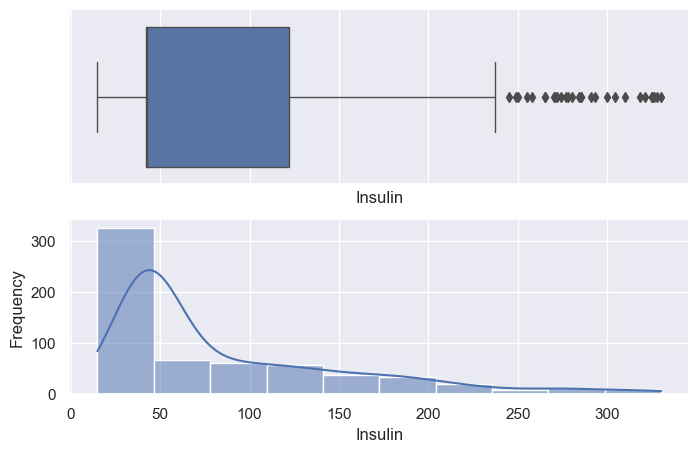

<Figure size 800x500 with 0 Axes>

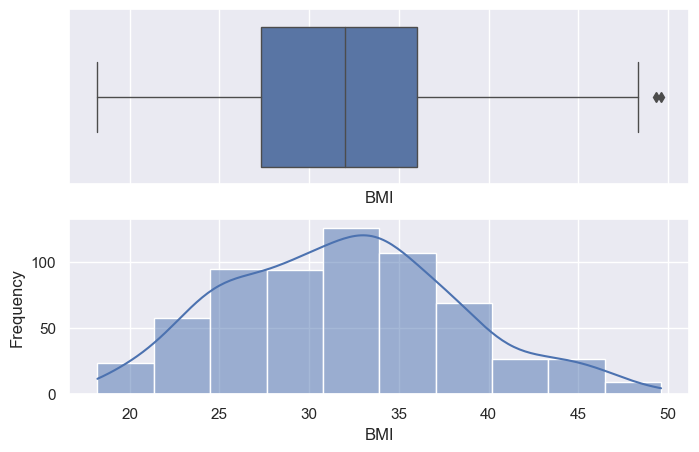

<Figure size 800x500 with 0 Axes>

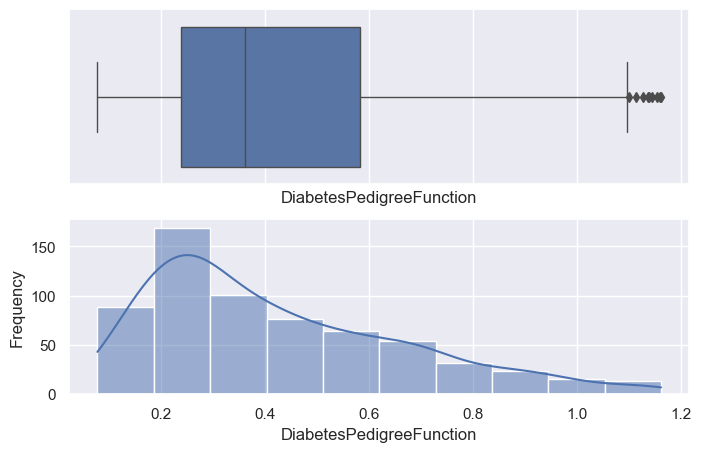

<Figure size 800x500 with 0 Axes>

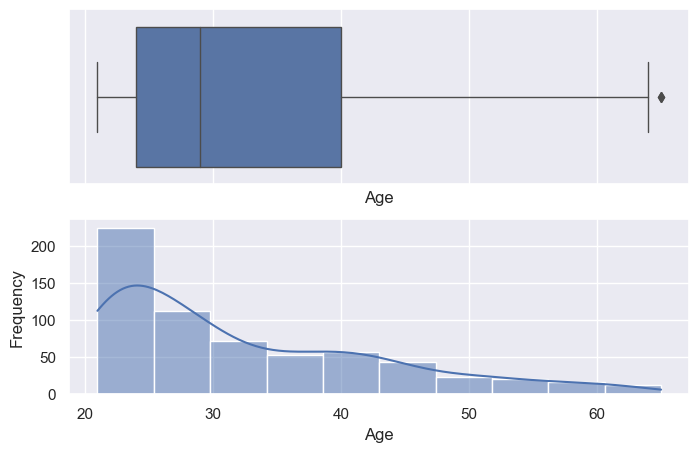

In [321]:
# Check if outliers are removed
for i in df.columns[0:-1]:
    #print(cols[columns])
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

##### Outliers were not completely but we have a clean dataset due the outliers treatment

In [322]:
# data validation
df.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               38.000
SkinThickness                7.000
Insulin                     15.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

#### BloodPressure - A living person cannot have a diastolic blood pressure of zero.
#### Plasma glucose levels - Zero is invalid number as fasting glucose level would never be as low as zero.
#### Skin Fold Thickness - For normal people, skin fold thickness can’t be less than 10 mm better yet zero.
#### BMI: Should not be 0 or close to zero unless the person is really underweight which could be life-threatening.
#### Insulin: In a rare situation a person can have zero insulin but by observing

Outcome
0    [[AxesSubplot(0.125,0.666111;0.215278x0.213889...
1    [[AxesSubplot(0.125,0.666111;0.215278x0.213889...
dtype: object

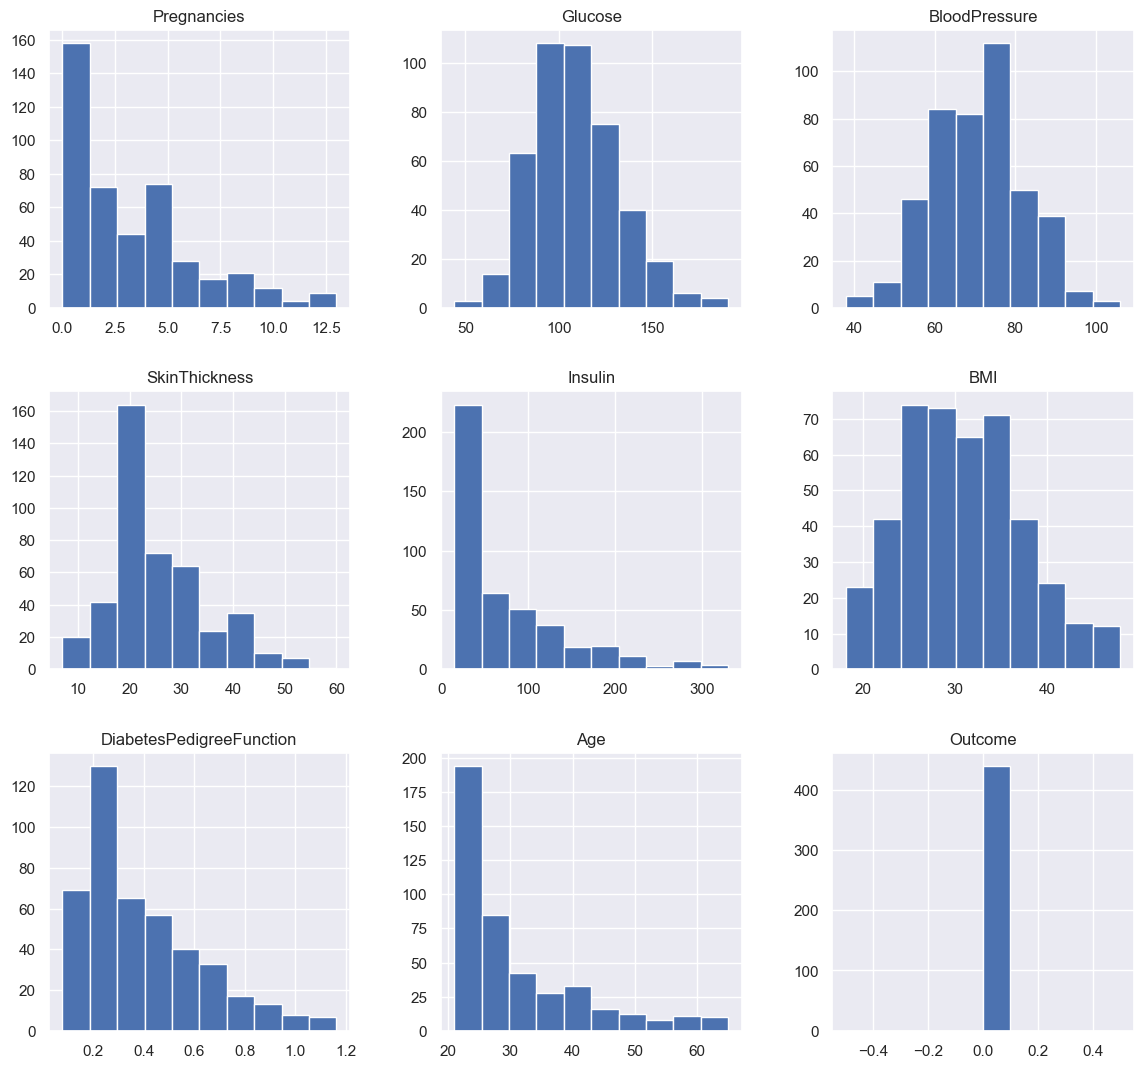

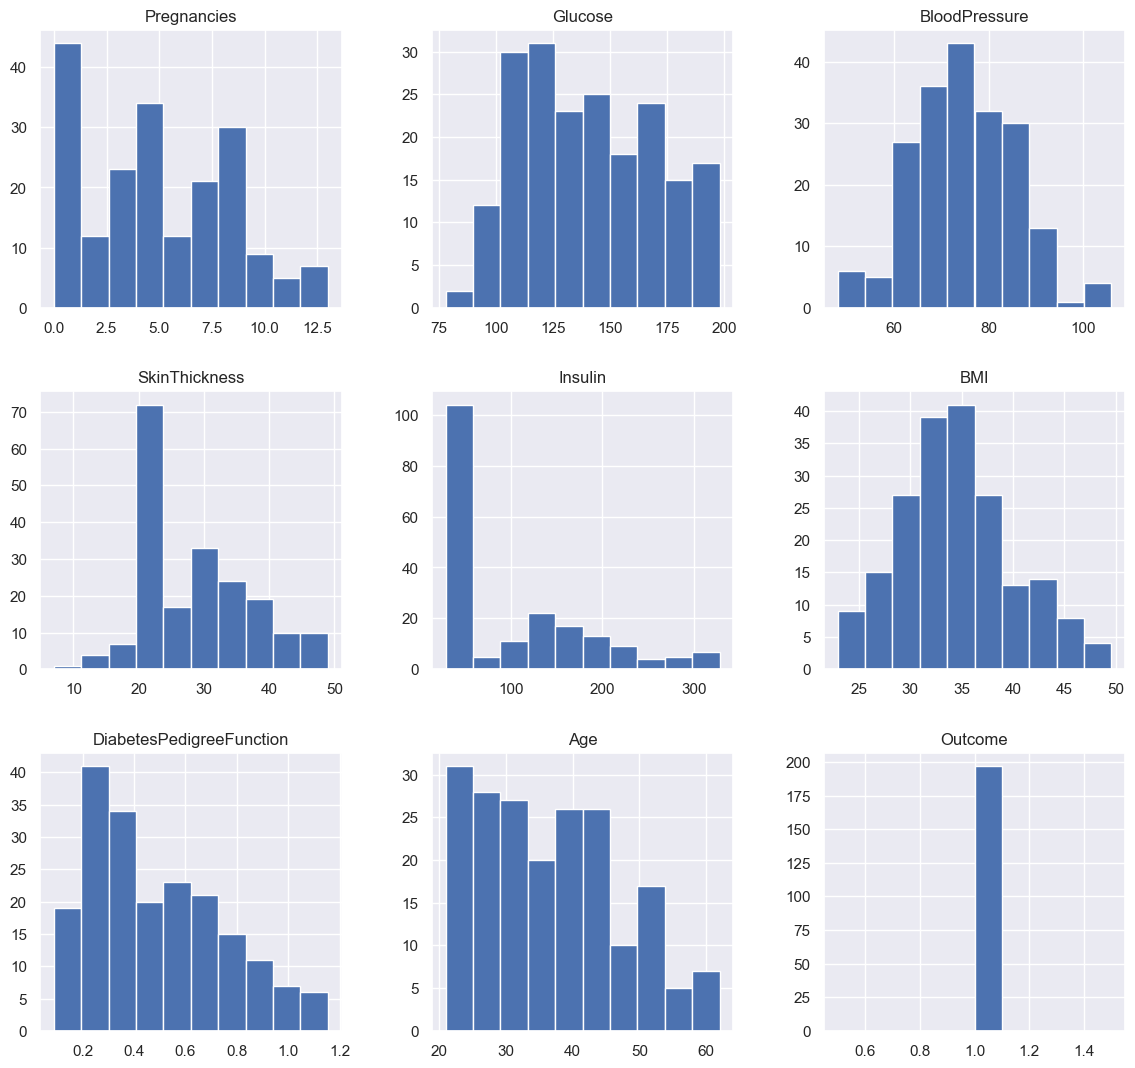

In [323]:
# perform EDA using histogram to see the distribution of the variables
df.groupby('Outcome').hist(figsize=(14, 13))

In [325]:
#function to get total count of zeros and outcome details together
def get_zeros_outcome_count(data,column_name):
    count = data[data[column_name] == 0].shape[0]
    print("Total No of zeros found in " + column_name + " : " + str(count))
    print(data[data[column_name] == 0].groupby('Outcome')['Age'].count())

In [326]:
#Checking count of zeros in blood pressure
get_zeros_outcome_count(df,'BloodPressure')

Total No of zeros found in BloodPressure : 0
Series([], Name: Age, dtype: int64)


In [327]:
#Checking count of zeros in glucose level
get_zeros_outcome_count(df, 'Glucose')

Total No of zeros found in Glucose : 0
Series([], Name: Age, dtype: int64)


In [328]:
#Checking count of zeros in skin thickness
get_zeros_outcome_count(df, 'SkinThickness')

Total No of zeros found in SkinThickness : 0
Series([], Name: Age, dtype: int64)


In [329]:
#Checking count of zeros in BMI
get_zeros_outcome_count(df, 'BMI')

Total No of zeros found in BMI : 0
Series([], Name: Age, dtype: int64)


In [330]:
#Checking count of zeros in Insulin
get_zeros_outcome_count(df, 'Insulin')

Total No of zeros found in Insulin : 0
Series([], Name: Age, dtype: int64)


In [331]:
# We will check the stats of data after removing BloodPressure, BMI and Glucose 0 rows
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,636.0,3.786164,3.251388,0.000,1.00000,3.000,6.000,13.000
Glucose,636.0,118.869497,28.996773,44.000,99.00000,114.000,136.250,198.000
BloodPressure,636.0,72.007862,11.301102,38.000,64.00000,72.000,80.000,106.000
SkinThickness,636.0,26.185535,9.233805,7.000,20.00000,23.000,32.000,60.000
Insulin,636.0,88.828616,68.487924,15.000,42.00000,42.500,122.000,330.000
BMI,636.0,31.964151,6.384132,18.200,27.30000,32.000,36.000,49.600
DiabetesPedigreeFunction,636.0,0.426237,0.245088,0.078,0.23875,0.361,0.583,1.162
Age,636.0,32.555031,10.879807,21.000,24.00000,29.000,40.000,65.000
Outcome,636.0,0.309748,0.462754,0.000,0.00000,0.000,1.000,1.000


In [332]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,42,33.6,0.627,50,1
1,1,85,66,29,42,26.6,0.351,31,0
2,8,183,64,20,42,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,20,42,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,42,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,20,42,30.1,0.349,47,1


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [333]:
# Logistic Regreation and model building
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_names]
y = df.Outcome

In [334]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [335]:
# Create Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [336]:
#LR Model
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [337]:
#now check LR model score and accuracy score 

print("LogisticRegression Score :{}".format(model_LR.score(X_train,y_train)))
y_pred = model_LR.predict(X_test)
scores = (accuracy_score(y_test, y_pred))
print("LogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.7677165354330708
LogisticRegression Accuracy Score :0.796875


In [338]:
# define models to compare accuracy scores
accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [339]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('KNN', KNeighborsClassifier()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier()),
 ('GB', GradientBoostingClassifier())]

In [341]:
#We fit each model in a loop and calculate the accuracy of the respective model using the “accuracy_score”
for name, model in models:
    model.fit(X_train, y_train)
    modelScores.append(model.score(X_train,y_train))
    y_pred = model.predict(X_test)
    accuracyScores.append(accuracy_score(y_test, y_pred))
    names.append(name)
    
model_used = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(model_used)

  Name     Score  Accuracy Score
0   LR  0.767717        0.796875
1  KNN  0.812992        0.750000
2   DT  1.000000        0.726562
3   RF  1.000000        0.796875
4   GB  0.940945        0.796875


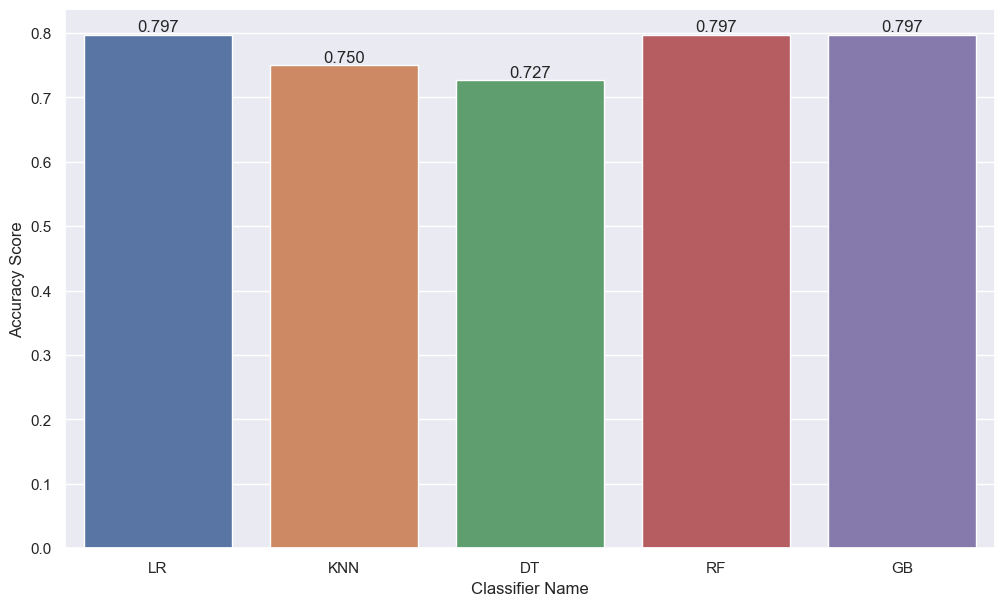

In [342]:
#Lets draw graph to understand more.
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Accuracy Score', data = model_used)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")
    
plt.show()

##### Now lets perform K-Fold Cross Validation with Scikit Learn
##### We will move forward with K-Fold cross validation as it is more accurate and use the data efficiently. 
##### We will train the models using 10 fold cross validation and calculate the mean accuracy of the models. 
##### "k_fold_cross_val_score" provides its own training and accuracy calculation interface.

In [343]:
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)
k_fold_cross_val_score = pd.DataFrame({'Name': names, 'Kfold Score': scores})
print(k_fold_cross_val_score)

  Name  Kfold Score
0   LR     0.773909
1  KNN     0.743899
2   DT     0.693477
3   RF     0.802059
4   GB     0.772197


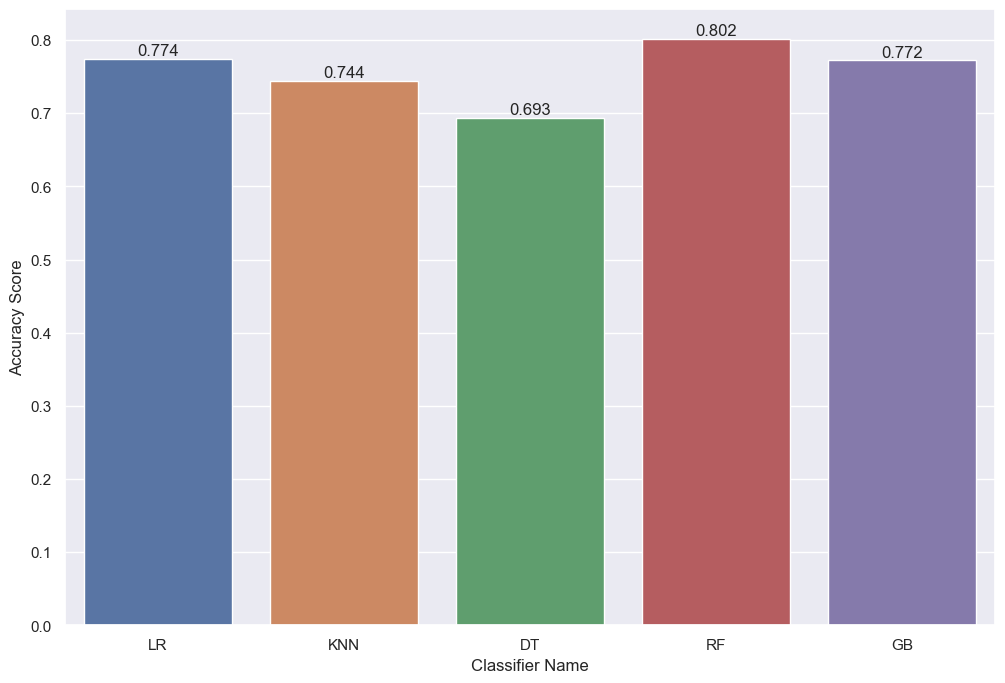

In [344]:
plt.subplots(figsize=(12, 8))
axis = sns.barplot(x = 'Name', y = 'Kfold Score', data = k_fold_cross_val_score)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height), ha="center")

##### We can see the Logistic Regression,Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Random Forest performs better than the other algorithms.
##### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc - AUC-ROC curve helps us visualize how well our machine learning classifier is performing.
##### Now lets check confussion matric

In [355]:
# show classification report
names = []
reports = []
for name, model in models:
    class_report = classification_report(y,model_LR.predict(X))
    names.append(name)
    reports.append(class_report)
print(names[0], reports[0])
print(names[1], reports[1])
print(names[2], reports[2])
print(names[3], reports[3])
print(names[4], reports[4])

LR               precision    recall  f1-score   support

           0       0.80      0.90      0.85       439
           1       0.69      0.50      0.58       197

    accuracy                           0.77       636
   macro avg       0.74      0.70      0.71       636
weighted avg       0.76      0.77      0.76       636

KNN               precision    recall  f1-score   support

           0       0.80      0.90      0.85       439
           1       0.69      0.50      0.58       197

    accuracy                           0.77       636
   macro avg       0.74      0.70      0.71       636
weighted avg       0.76      0.77      0.76       636

DT               precision    recall  f1-score   support

           0       0.80      0.90      0.85       439
           1       0.69      0.50      0.58       197

    accuracy                           0.77       636
   macro avg       0.74      0.70      0.71       636
weighted avg       0.76      0.77      0.76       636

RF       

In [356]:
# check model summary
import statsmodels.api as sm
features2 = sm.add_constant(X)
model_v = sm.OLS(y, features2)
model_summary = model_v.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     37.37
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           1.49e-48
Time:                        10:03:29   Log-Likelihood:                -287.89
No. Observations:                 636   AIC:                             593.8
Df Residuals:                     627   BIC:                             633.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [357]:
# remove the variable with high p value to see if the R_squared will improve
x = df.drop(columns=['BloodPressure','SkinThickness', 'Insulin','Age'])

In [358]:
import statsmodels.api as sm
features2 = sm.add_constant(x)
model_v = sm.OLS(y, features2)
model_summary = model_v.fit()
print(model_summary.summary())

                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.450e+29
Date:                Tue, 25 Jul 2023   Prob (F-statistic):               0.00
Time:                        10:03:47   Log-Likelihood:                 19403.
No. Observations:                 636   AIC:                        -3.879e+04
Df Residuals:                     630   BIC:                        -3.877e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

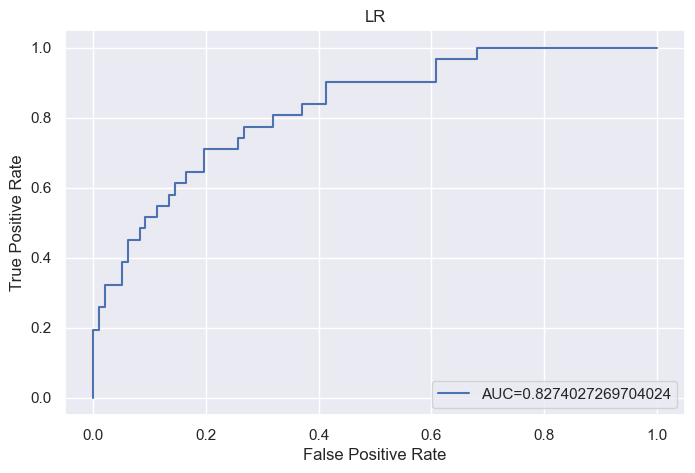

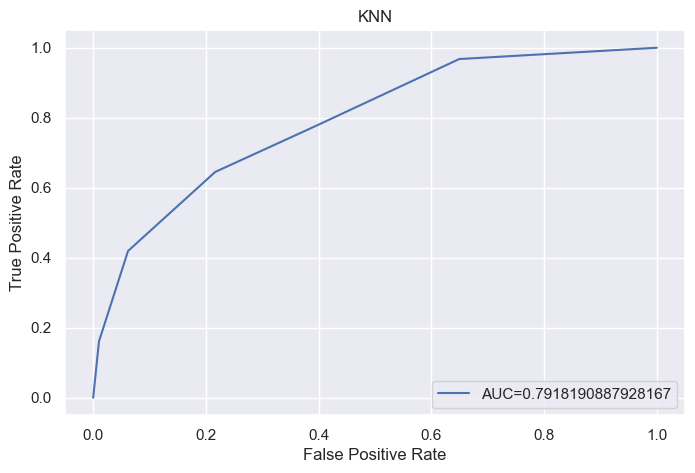

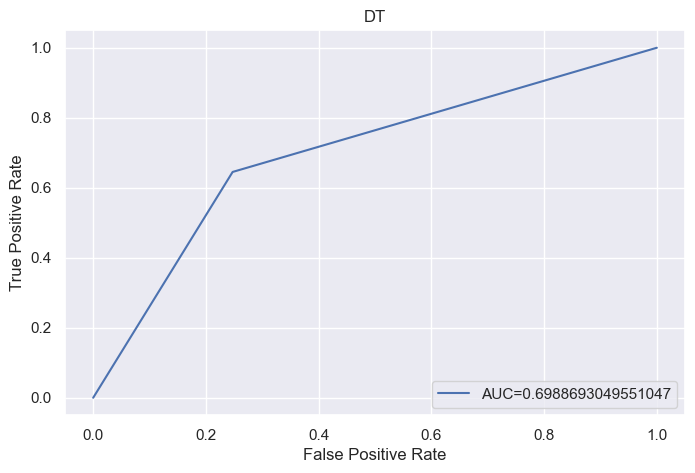

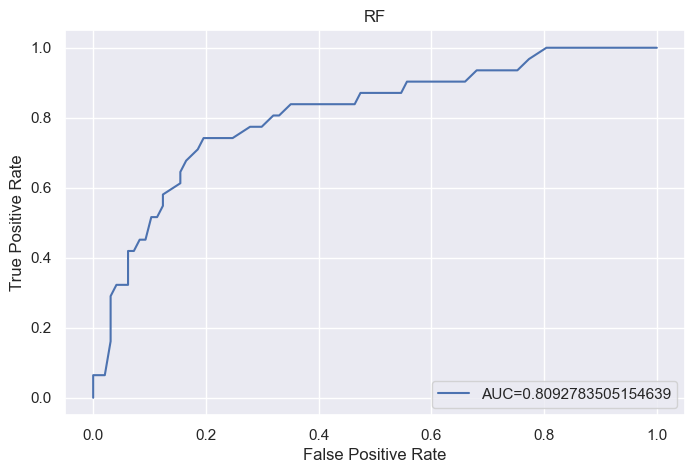

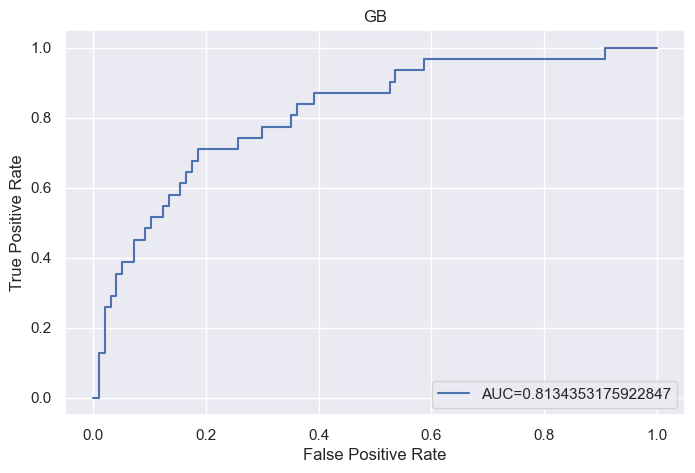

In [362]:
#show roc and roc_auc score for each algorithm
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn import metrics

for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr,thresholds = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title(name)
    plt.legend(loc=4)
    plt.show()

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- From my EDA, the variables shows a relatively positive relationship between each other.
- Logistic Regression,Random Forest and Gradient Boosting have performed better than the rest. From the base level we can observe that the Random forest performs better than the other algorithms.
- Diabetic and non-diabetic group have almost same distribution pattern.
- EDA shows a lot of outliers (zero) in skinthickness and insulin.